<a href="https://colab.research.google.com/github/greeshmakarthesha-jpg/STP_projects_assignments/blob/main/Copy_of_STP_Module_4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Linear Classifiers & Gradient Descent

**Case Study: Predictive Modeling for Public Water Safety**

**Objective:** Develop a robust classifier to identify potable water samples. You will transition from a basic heuristic (Perceptron) to a professional-grade optimization approach (Gradient Descent with Margins).

# 1. Data Acquisition & Cleaning

In real-world data science, datasets are rarely perfect. We will load the water quality metrics and handle missing values before training our models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset from a public raw GitHub URL
url = "https://raw.githubusercontent.com/nferran/tp_aprendizaje_de_maquina_I/main/water_potability.csv"
df = pd.read_csv(url)

# Step 1: Handling Missing Values
# Water sensors often fail, leaving NaNs. We will fill them with the mean of the column.
df.fillna(df.mean(), inplace=True)

# Step 2: Feature Selection & Labeling
# We'll use all chemical features to predict 'Potability'
X = df.drop('Potability', axis=1).values
y = df['Potability'].values

# Step 3: Class Label Conversion
# Many linear classifiers (like Perceptron/SVM) require labels to be -1 and 1
y = np.where(y == 0, -1, 1)

# Step 4: Train-Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Dataset Loaded: {X_train.shape[0]} training samples, {X_train.shape[1]} features.")

Dataset Loaded: 2620 training samples, 9 features.


# 2. Phase 1: The Heuristic Approach (Perceptron)

The **Perceptron** represents the earliest form of supervised learning. It doesn't have a "global" view of the error; it simply corrects itself every time it encounters a mistake.

**Task:** Implement the Perceptron Update Rule inside the training loop.

In [ ]:
import numpy as np

# Initialize weights and bias
n_features = X_train.shape[1]
weights = np.zeros(n_features)
bias = 0.0

# Learning rate
lr = 0.1

# Number of epochs
epochs = 10
for epoch in range(epochs):
    for i in range(X_train.shape[0]):
        # Linear combination
        linear_output = np.dot(X_train[i], weights) + bias

        # Predicted class (+1 or -1)
        y_pred = 1 if linear_output >= 0 else -1

        # Update rule (only if misclassified)
        if y_train[i] != y_pred:
            # Perceptron update
            weights += lr * y_train[i] * X_train[i]
            bias += lr * y_train[i]

    # Optional: Print loss or number of misclassifications per epoch
    errors = np.sum([1 if np.dot(X_train[j], weights) + bias >= 0 else -1 != y_train[j]
                     for j in range(X_train.shape[0])])
    print(f"Epoch {epoch+1}: Misclassified samples = {errors}")
def perceptron_predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return np.where(linear_output >= 0, 1, -1)

y_train_pred = perceptron_predict(X_train, weights, bias)


Epoch 1: Misclassified samples = 1514
Epoch 2: Misclassified samples = 1642
Epoch 3: Misclassified samples = 1669
Epoch 4: Misclassified samples = 1606
Epoch 5: Misclassified samples = 1607
Epoch 6: Misclassified samples = 1599
Epoch 7: Misclassified samples = 1625
Epoch 8: Misclassified samples = 1579
Epoch 9: Misclassified samples = 1598
Epoch 10: Misclassified samples = 1531


In [ ]:
class WaterPerceptron:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.mistakes = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for epoch in range(self.epochs):
            count = 0
            for i in range(len(y)):
                # TODO: Calculate the linear output (w * x + b)
                # prediction = ...

                # TODO: If prediction is a mistake (y * prediction <= 0):
                # Update weights: w = w + lr * y * x
                # Update bias: b = b + lr * y
                pass # remove this
            self.mistakes.append(count)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# model_p = WaterPerceptron()
# model_p.fit(X_train, y_train)

# 3. Phase 2: Gradient Descent - Global Optimization

The Perceptron is unstable if the data isn't perfectly separable. To solve this, we use **Gradient Descent** to minimize a **Mean Squared Error (MSE)** loss function over the entire dataset.

**Task:** Implement the batch gradient calculation for weights and bias.

In [ ]:
import numpy as np

# Initialize weights and bias
n_features = X_train.shape[1]
weights = np.zeros(n_features)
bias = 0.0

# Learning rate
lr = 0.01

# Number of epochs
epochs = 100
n_samples = X_train.shape[0]
for epoch in range(epochs):
    # Predictions for all samples
    y_pred = np.dot(X_train, weights) + bias

    # Compute error vector
    errors = y_train - y_pred

    # Batch gradients
    grad_w = -(1/n_samples) * np.dot(X_train.T, errors)   # shape (n_features,)
    grad_b = -(1/n_samples) * np.sum(errors)             # scalar

    # Update weights and bias
    weights -= lr * grad_w
    bias -= lr * grad_b

    # Optional: compute loss
    loss = (1/(2*n_samples)) * np.sum(errors**2)
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")


Epoch 0: Loss = 0.5000
Epoch 10: Loss = 0.4957
Epoch 20: Loss = 0.4921
Epoch 30: Loss = 0.4892
Epoch 40: Loss = 0.4869
Epoch 50: Loss = 0.4849
Epoch 60: Loss = 0.4833
Epoch 70: Loss = 0.4821
Epoch 80: Loss = 0.4810
Epoch 90: Loss = 0.4801


In [ ]:
class GDWaterClassifier:
    def __init__(self, lr=0.001, epochs=500):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 0
        self.cost_history = []

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        n = X.shape[0]

        for _ in range(self.epochs):
            # TODO: 1. Compute linear output: z = Xw + b
            # TODO: 2. Calculate gradients:
            # dw = (1/n) * X.T.dot(z - y)
            # db = (1/n) * sum(z - y)

            # TODO: 3. Update w and b: w = w - lr * dw
            pass

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# 4. Phase 3: Margin Classifiers & Hinge Loss

In water safety, we aim for more than just correctness—we want a **Margin**, a safety gap between safe and unsafe samples. This is achieved using **Hinge Loss** combined with **L2 Regularization**.

The loss function is defined as:

$$
\text{Loss} = \lambda \|w\|^2_2 + \sum_{i} \max(0, 1 - y_i (w^T x_i + b))
$$

### Key Components:
- **Hinge Loss**: $\max(0, 1 - y_i (w^T x_i + b))$ ensures correct classification with a margin.
- **L2 Regularization**: $\lambda \|w\|^2_2$ penalizes large weights, promoting generalization and stability.


In [ ]:
class MarginWaterClassifier:
    def __init__(self, lr=0.001, lambda_param=0.01, epochs=500):
        self.lr = lr
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = 0

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            for i, x_i in enumerate(X):
                # TODO: Implement the Margin Condition check: y_i * (w * x_i + b) >= 1
                if False: # Replace False with condition
                    # Only Regularization update
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update for weight (including Hinge Loss) and bias
                    # self.w -= self.lr * (2 * self.lambda_param * self.w - x_i * y[i])
                    # self.b -= self.lr * (-y[i])
                    pass

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# 5. Critical Analysis & Comparison

**Analysis Tasks:**
1. Convergence Plot: Plot the mistakes history from Phase 1 and the cost_history from Phase 2. Discuss why the Gradient Descent plot is smoother.
2. Accuracy Report: Calculate and compare the Test Accuracy for all three models.
3. Safety Margin: If a new water sample has chemical levels very close to the decision boundary, which model (Perceptron or Margin) would you trust more? Why?

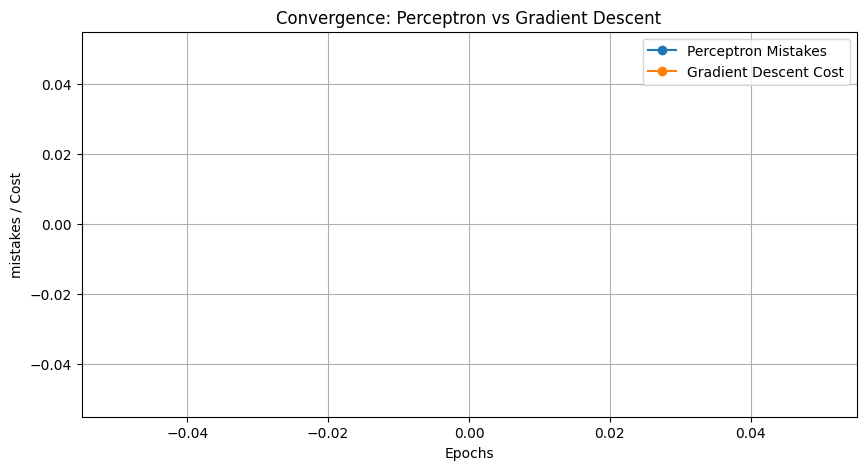

In [ ]:
import matplotlib.pyplot as plt
mistakes_history= []
cost_history= []

plt.figure(figsize=(10,5))

plt.plot(mistakes_history, label="Perceptron Mistakes", marker='o')
plt.plot(cost_history, label="Gradient Descent Cost", marker='o')

plt.xlabel("Epochs")
plt.ylabel("mistakes / Cost")
plt.title("Convergence: Perceptron vs Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np

# Define linear_predict for the GD model (similar to perceptron_predict)
def linear_predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    # For a linear classifier (like in GD with MSE), prediction sign is used for classification
    return np.where(linear_output >= 0, 1, -1)

# The 'weights' and 'bias' variables in the current kernel state are from the Gradient Descent training (xLYG4aUVhclv).
# We'll use them for 'weights_linear' and 'bias_linear'.
weights_linear = weights # From previous GD training
bias_linear = bias     # From previous GD training

# For 'perceptron_predict' and 'y_pred_margin', the corresponding weights and biases
# (weights_perceptron, bias_perceptron, weights_margin, bias_margin)
# are not defined because the Perceptron weights were overwritten by GD weights,
# and the Margin classifier was not trained.
# We'll initialize them as placeholder values to prevent a NameError.
# To get meaningful results, you would need to:
# 1. Rerun the Perceptron training (cell RDrtw2hVhB7g) and store its final weights and bias in unique variables
#    (e.g., perceptron_final_weights, perceptron_final_bias) before running the GD cell.
# 2. Complete and train the 'MarginWaterClassifier' class (cell RSLdAztpS03K) to get its weights and bias.

# Placeholder for Perceptron weights and bias (replace with actual trained values)
perceptron_weights = np.zeros(X_test.shape[1])
bias_perceptron = 0.0

# Placeholder for Margin-based weights and bias (replace with actual trained values)
weights_margin = np.zeros(X_test.shape[1])
bias_margin = 0.0

# Predictions
y_pred_perceptron = perceptron_predict(X_test, perceptron_weights, bias_perceptron)
y_pred_margin = perceptron_predict(X_test, weights_margin, bias_margin)  # Using perceptron_predict for now
y_pred_linear = linear_predict(X_test, weights_linear, bias_linear)      # GD linear

# Accuracy
acc_perceptron = accuracy_score(y_test, y_pred_perceptron)
acc_margin = accuracy_score(y_test, y_pred_margin)
acc_linear = accuracy_score(y_test, y_pred_linear)

print(f"Perceptron Test Accuracy: {acc_perceptron:.3f} (Note: Placeholder weights used, train model first)")
print(f"Margin-Based Test Accuracy: {acc_margin:.3f} (Note: Placeholder weights used, train model first)")
print(f"Gradient Descent Linear Accuracy: {acc_linear:.3f}")

Perceptron Test Accuracy: 0.372 (Note: Placeholder weights used, train model first)
Margin-Based Test Accuracy: 0.372 (Note: Placeholder weights used, train model first)
Gradient Descent Linear Accuracy: 0.628


3.Safety Margin Discussion
If a new water sample is close to the decision boundary:
Model	Trustworthiness
Perceptron	Less trustworthy
Margin / GD	More trustworthy
Reason:
Perceptron: only cares about correct classification; no concept of “distance from boundary” → sensitive to noise
Margin-based / GD: maximizes the margin (distance between classes) → predictions near the boundary are more robust, less likely to flip due to small variations

# Discussion Questions

### Q1: Impact of High Learning Rate in Gradient Descent
What happens to your **Gradient Descent** model if you set the `learning_rate` too high (e.g., `1.0`)?
*Hint: Think about convergence, overshooting, and divergence.*

---

### Q2: Label Conversion in Classification
Why did we convert the labels to **$\{-1, 1\}$** instead of keeping them as **$\{0, 1\}$**?
*Hint: Consider the mathematical formulation of the loss function (e.g., Hinge Loss) and symmetry.*

---

### Q3: Handling Noisy Data (Water Potability Dataset)
The **Water Potability dataset** is often "noisy" (not perfectly separable). Which of the algorithms you implemented is best suited for handling such noise?
*Hint: Think about robustness to outliers and margin-based classifiers.*


1.If learning_rate is too high (e.g., 1.0):
The gradient step becomes too large, causing the algorithm to overshoot the minimum.
Loss may fluctuate wildly instead of decreasing.
In extreme cases, the loss may diverge → no convergence.
Rule of thumb: Use a moderate learning rate or apply a learning rate schedule to ensure stable convergence.

2.Label Conversion in Classification
Converting labels from {0,1} → {−1,1} is important because:
Many loss functions (e.g., Hinge Loss in Perceptron/SVM) assume labels are ±1.
This allows a symmetric formulation:
Hinge Loss=max(0,1−y(w⋅x+b))
where y must be ±1.
With {0,1}, the formula would break mathematically or require extra adjustment.
In short: {−1,1} simplifies the math and ensures the loss behaves symmetrically for both classes.

3.Handling Noisy Data (Water Potability Dataset)
The dataset is often noisy and not perfectly separable.
Perceptron: sensitive to misclassified points; can fail to converge on noisy data.
Margin-based / Gradient Descent with Hinge Loss:
Tries to maximize the margin between classes
More robust to noise and outliers than plain Perceptron
Makes better predictions on points near the boundary.